In [1]:
# Import library for statistical analysis.
import statsmodels.api as sm 
# Import inbuilt data sets in sklearn library.
from sklearn import datasets 
# Import for numerical calculations.
import numpy as np  
# Import sklearn's linear model algorithm.
from sklearn import linear_model 
# Import Pandas library.
import pandas as pd 
# Import for plot generation.
import matplotlib.pyplot as plt 

# Import metrics for measuring linear model fit:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
#Data ingestion

In [3]:
url1 = 'https://raw.githubusercontent.com/Pota1987/Data-Analytics-LSE/main/lego.csv'
lego = pd.read_csv(url1, index_col = 0)
url2 = 'https://raw.githubusercontent.com/Pota1987/Data-Analytics-LSE/main/game_reviews.csv'
grev = pd.read_csv(url2, index_col = 0)
url3 = 'https://raw.githubusercontent.com/Pota1987/Data-Analytics-LSE/main/games_sales.csv'
gsal = pd.read_csv(url3, index_col = 0)


In [4]:
grev.head()

,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
overall,,,,,,,,
2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [5]:
#data wrangling

In [6]:
#First dataset: game_reviews

In [7]:
grev.shape

(15000, 8)

In [8]:
grev.dtypes

verified            bool
reviewTime        object
reviewerID        object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
image             object
dtype: object

In [9]:
#converting column Date into datetime 
grev['reviewTime'] = grev['reviewTime'].astype('datetime64')

In [10]:
grev.isnull().sum()

verified              0
reviewTime            0
reviewerID            0
reviewerName          0
reviewText           10
summary               2
unixReviewTime        0
image             14840
dtype: int64

In [11]:
grev.head()

,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
overall,,,,,,,,
2,False,2016-09-22,A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,False,2016-09-18,A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
3,True,2016-09-12,A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
5,True,2017-03-02,A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
1,True,2017-02-08,A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [12]:
grev1 = grev.drop(columns=['image'])

In [13]:
game_reviews = grev1.dropna()

In [14]:
game_reviews.shape

(14988, 7)

In [15]:
#Second dataset: game_sales

In [16]:
gsal.shape

(16598, 8)

In [17]:
gsal.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
Global_Sales    float64
dtype: object

In [18]:
gsal.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
Rank,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,31.37


In [19]:
gsal.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
Global_Sales      0
dtype: int64

In [20]:
gsal1 = gsal.dropna()

In [21]:
#Third dataset: lego

In [22]:
lego.shape

(12261, 6)

In [23]:
lego.dtypes

list_price           float64
num_reviews            int64
piece_count            int64
play_star_rating     float64
review_difficulty      int64
country                int64
dtype: object

In [24]:
lego.head()

,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
ages,,,,,,
19,29.99,2,277,4.0,0,20
19,19.99,2,168,4.0,2,20
19,12.99,11,74,4.3,2,20
5,99.99,23,1032,3.6,0,20
5,79.99,14,744,3.2,1,20


In [25]:
lego.isnull().sum()

list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
dtype: int64

In [26]:
#Determine the optimal price at which they should sell Lego products 
#based on the number of Lego pieces in the Lego set
#and the age of customer that the product is most likely to be purchased by (Week 1)
#What price should be set for the Lego sets that have the 8000 Lego pieces?
#What price should be set for all the Lego sets that have 8000 Lego pieces 
#and are most likely to be purchased by customers who are 30 years old?

In [27]:
#Exploratory Data Analysis

In [28]:
lego.describe()

,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


In [29]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [30]:
# Define the dependent variable.
y = lego['list_price'].values.reshape(-1, 1) 

# Define the independent variable.
x = lego['piece_count'].values.reshape(-1, 1) 

In [31]:
x.shape

(12261, 1)

In [32]:
f = 'y ~ x'
test = ols(f, data = lego).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 3.804e+04
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:57:25   Log-Likelihood:                -64182.
No. Observations:               12261   AIC:                         1.284e+05
Df Residuals:                   12259   BIC:                         1.284e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.3243      0.478     36.256      0.000      16.388      18.261
x              0.0969      0.000    195.027      0.000       0.096       0.098
==============================================================================
Omnibus:                    13987.172   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2037748.322
Skew:                           5.819   Prob(JB):                         0.00
Kurtosis:                      65.075   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'whiskers': [<matplotlib.lines.Line2D at 0x1129296ccd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1129298c370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1129296c880>,
 'medians': [<matplotlib.lines.Line2D at 0x1129298ca90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1129298ce20>,
 'means': []}

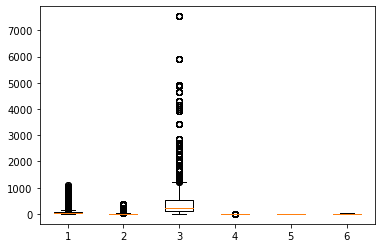

In [33]:
plt.boxplot(lego)

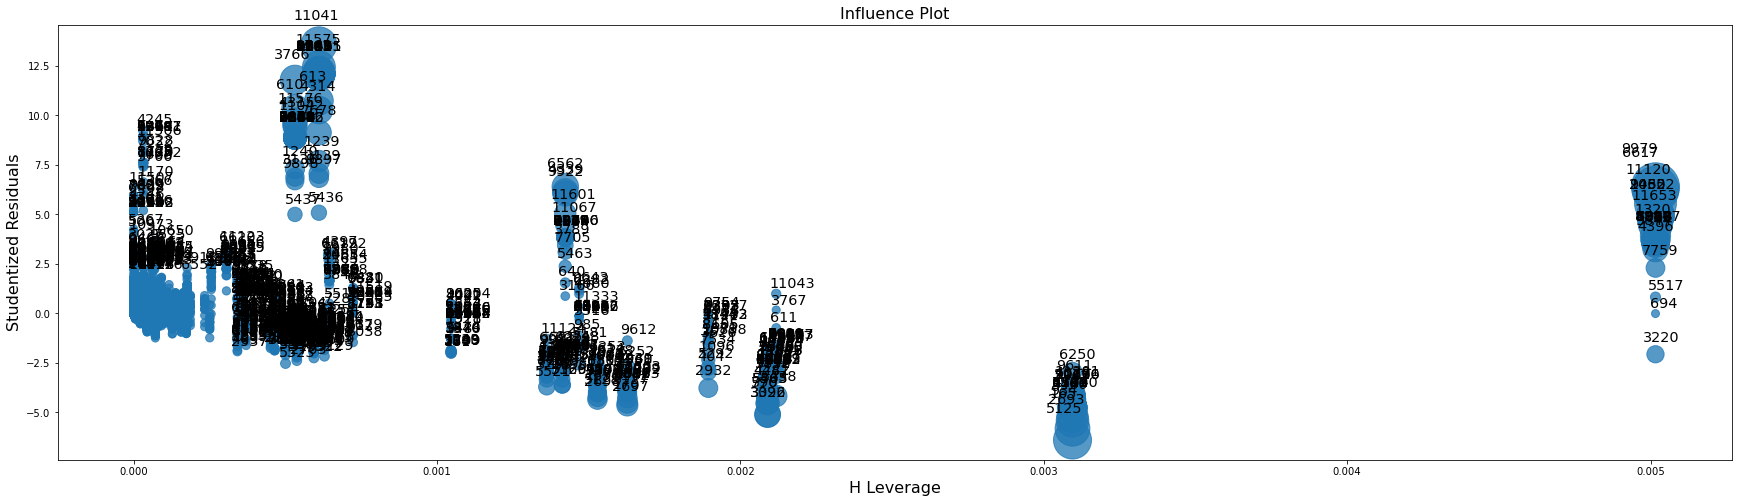

In [34]:
from statsmodels.stats.outliers_influence import OLSInfluence as olsi
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
lm = sm.OLS(y, x).fit()
studentized_residuals = olsi(lm).resid_studentized
leverage_pts = olsi(lm).hat_matrix_diag
cook_dist = olsi(lm).cooks_distance

fig, ax = plt.subplots(figsize=(30,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")

In [35]:
cols = ['list_price', 'piece_count'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = lego[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = lego[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((lego[cols] < (Q1 - 1.5 * IQR)) | (lego[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_df = lego[condition]

In [36]:
# Define the dependent variable.
y = filtered_df['list_price'].values.reshape(-1, 1) 

# Define the independent variable.
x = filtered_df['piece_count'].values.reshape(-1, 1) 

In [37]:
f = 'y ~ x'
test = ols(f, data = filtered_df).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 2.480e+04
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:57:41   Log-Likelihood:                -46755.
No. Observations:               11006   AIC:                         9.351e+04
Df Residuals:                   11004   BIC:                         9.353e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8040      0.235     63.089      0.000      14.344      15.264
x              0.0960      0.001    157.491      0.000       0.095       0.097
==============================================================================
Omnibus:                     4040.565   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23970.481
Skew:                           1.648   Prob(JB):                         0.00
Kurtosis:                       9.435   Cond. No.                         560.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#The decision is to drop the outliers

In [39]:
lm = LinearRegression()

# Fit the model.
lm.fit(x, y) 

LinearRegression()

In [40]:
# Print the target values.
lm.predict(y)  

array([[17.68312607],
       [16.723088  ],
       [16.05106134],
       ...,
       [17.14529354],
       [15.97404709],
       [15.97404709]])

In [41]:
# Call the intercept.
lm.intercept_ 

array([14.80397189])

In [42]:
# Estimated coefficients
lm.coef_ 

array([[0.09600381]])

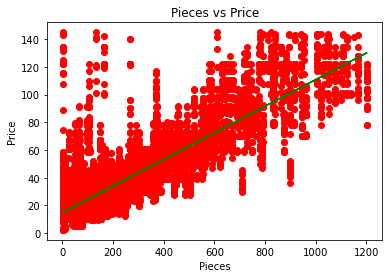

In [43]:
# [1] Create a scatterplot (with red data points). 
plt.scatter(x, y, color = "red")  
# [2] Create a regression line in green.
plt.plot(x, lm.predict(x), color = "green") 
# [3] Set the title for the graph.
plt.title("Pieces vs Price") 
# [4] Set the label for the x-axis.
plt.xlabel("Pieces") 
# [5] Set the label for the y-axis.
plt.ylabel("Price")
# [6] Print the graph. 
plt.show() 

In [44]:
# Use the predict() method with an array to call the 
# prices for each number of pieces’ experience.
predictedprice = lm.predict([[8000]])  

# Print the results.
print(predictedprice)  

[[782.83443066]]


In [45]:
#Testing the model

In [46]:
# [1] Import the sklearn module.
from sklearn.model_selection import train_test_split 

# [2] Create  the subset (50/50); 
# [3] Control the shuffling/avoid variation 
# in values between variable.
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.5, 
                                                 random_state=100) 

In [47]:
# Linear regression; fitting the model.
lm.fit(x_train,y_train) 

LinearRegression()

In [48]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

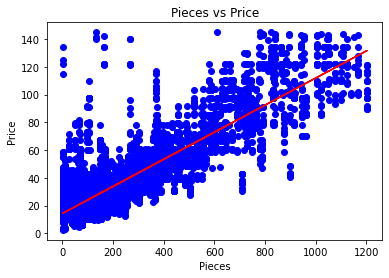

In [49]:
# [1] Create a scatterplot (with red data points).
plt.scatter(x_train, y_train, color = "blue")  
# [2] Create a regression line in green.
plt.plot(x_train, y_pred, color = "red")
# [3] Set the title for the graph.  
plt.title("Pieces vs Price")
# [4] Set the label for the x-axis.  
plt.xlabel("Pieces")
# [5] Set the label for the y-axis.   
plt.ylabel("Price") 
# [6] Print the graph. 
plt.show()  

In [50]:
# Print R-squared value of the training data.
print(lm.score(x_train,y_train)) 

0.7065774173949508


In [51]:
# Print the intercept value.
print("Intercept value: ", lm.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lm.coef_) 

Intercept value:  [14.23527462]
Coefficient value:  [[0.09773515]]


In [52]:
#The coefficient value tells us that 
#each additional piece of lego is associated with an increase in average price of $0.09

In [53]:
lego = lego.reset_index()

In [54]:
# Linear regression; fitting the model.
lm.fit(x_test,y_test) 

LinearRegression()

In [55]:
# Predict the test set values.
y_pred = lm.predict(x_test) 

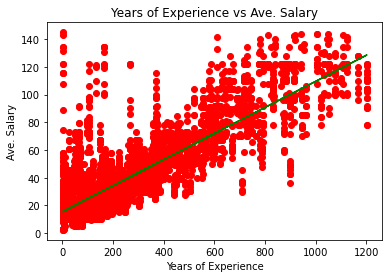

In [56]:
# [1] Create a scatterplot (with red data points).
plt.scatter(x_test, y_test, color = "red")  
# [2] Create a regression line in green.
plt.plot(x_test, y_pred, color = "green")
# [3] Set the title for the graph.  
plt.title("Years of Experience vs Ave. Salary")
# [4] Set the label for the x-axis.  
plt.xlabel("Years of Experience")
# [5] Set the label for the y-axis.   
plt.ylabel("Ave. Salary") 
# [6] Print the graph. 
plt.show() 

In [57]:
# Print R-squared value of the test data.
print(lm.score(x_test,y_test)) 

0.6779286382584017


In [58]:
# Print the intercept value.
print("Intercept value: ", lm.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

Intercept value:  [15.37075141]
Coefficient value:  [[0.09419907]]


In [59]:
# Define the dependent variable.
ya = lego['list_price'].values.reshape(-1, 1) 

# Define the independent variable.
Xa = lego[['piece_count','ages']].to_numpy()

In [60]:
Xa

array([[277,  19],
       [168,  19],
       [ 74,  19],
       ...,
       [233,  23],
       [ 48,  20],
       [109,  20]], dtype=int64)

In [61]:
lm = LinearRegression()

# Fit the model.
lm.fit(Xa, ya) 

LinearRegression()

In [62]:
model = sm.OLS(lego['list_price'], lego[['piece_count','ages']].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 1.902e+04
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:57:41   Log-Likelihood:                -64182.
No. Observations:               12261   AIC:                         1.284e+05
Df Residuals:                   12258   BIC:                         1.284e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
piece_count     0.0969      0.000    194.242      

In [63]:
lego[['piece_count','ages']].assign(const=1)

,piece_count,ages,const
0,277,19,1
1,168,19,1
2,74,19,1
3,1032,5,1
4,744,5,1
...,...,...,...
12256,341,23,1
12257,217,23,1
12258,233,23,1
12259,48,20,1


In [64]:
# Print the target values.
preds = results.predict(lego[['piece_count','ages']].assign(const=1))

In [65]:
lego[['piece_count','ages']].assign(const=1)

,piece_count,ages,const
0,277,19,1
1,168,19,1
2,74,19,1
3,1032,5,1
4,744,5,1
...,...,...,...
12256,341,23,1
12257,217,23,1
12258,233,23,1
12259,48,20,1


In [66]:
# Use the predict() method with an array to call the 
# prices for each number of pieces’ experience.
predictedprice = results.predict([[8000, 30,1]])

# Print the results.
print(predictedprice)  

[793.25612181]


In [67]:
#How many product segments should be utilised in sales and marketing strategies?

In [68]:
# import all the necessary packages
import numpy as np
import pandas as pd

import warnings  
warnings.filterwarnings("ignore")

In [69]:
# determine null values
lego.isnull().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
dtype: int64

In [70]:
# descriptive statistics
lego.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


In [71]:
# quick analysis on the variable 
print(len(lego['country'].unique()))

21


In [72]:
# quick analysis on the variable 
print(len(lego['play_star_rating'].unique()))

31


In [73]:
# quick analysis on the variable 
print(len(lego['review_difficulty'].unique()))

6


In [74]:
# quick analysis on the variable 
print(len(lego['list_price'].unique()))

733


In [75]:
# quick analysis on the variable 
print(len(lego['piece_count'].unique()))

447


In [76]:
# quick analysis on the variable 
print(len(lego['num_reviews'].unique()))

87


In [77]:
lego

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.9900,2,277,4.0,0,20
1,19,19.9900,2,168,4.0,2,20
2,19,12.9900,11,74,4.3,2,20
3,5,99.9900,23,1032,3.6,0,20
4,5,79.9900,14,744,3.2,1,20
...,...,...,...,...,...,...,...
12256,23,36.5878,6,341,4.4,2,19
12257,23,24.3878,8,217,4.1,2,19
12258,23,24.3878,18,233,4.6,2,19
12259,20,12.1878,1,48,5.0,4,19


In [78]:
#define the target variable
X = lego
y = lego['ages']

In [79]:
# Import the LabelEncoder class:
from sklearn.preprocessing import LabelEncoder

#convert the target variable to integers
le = LabelEncoder()

#replace in the existing DataFrame with the integer values
X['ages'] = le.fit_transform(X['ages'])
y = le.transform(y)

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


In [81]:
X.head()
#to ensure that label encoding happend correctly

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [82]:
# Create an list with the column labels from X:
x_cols = X.columns

In [83]:
# Import the MinMaxScaler class.
from sklearn.preprocessing import MinMaxScaler 

# Create the object from ‘MinMaxScaler’.
ms = MinMaxScaler() 
# Modify X to scale values between 0 and 1.
X = ms.fit_transform(X) 
# Set X as equal to a new DataFrame.
X = pd.DataFrame(X, columns=[x_cols]) 

# Check the contents of the modified DataFrame.
X.head() 
#you can the see the difference between the above and below

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,0.633333,0.025138,0.005450,0.036605,0.80,0.0,1.0
1,0.633333,0.016069,0.005450,0.022149,0.80,0.4,1.0
2,0.633333,0.009720,0.029973,0.009682,0.86,0.4,1.0
3,0.166667,0.088625,0.062670,0.136737,0.72,0.0,1.0
4,0.166667,0.070486,0.038147,0.098541,0.64,0.2,1.0


In [84]:
# [1] Import the KMeans class.
from sklearn.cluster import KMeans 

#apply clustering 
kmeans = KMeans(n_clusters=8, random_state=0) 

kmeans.fit(X)

KMeans(random_state=0)

In [85]:
#for evaluating our final values
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
#very weak classification

Result: 42 out of 12261 samples were correctly labeled.


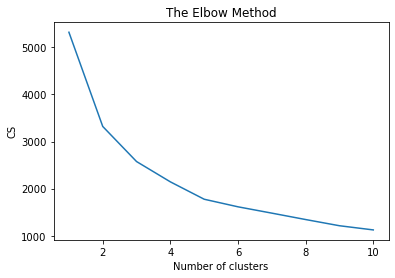

In [86]:
#elbow chart for us to decide on the number of optimal clusters
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()
#From the below chart we can take the optimal number as 5 

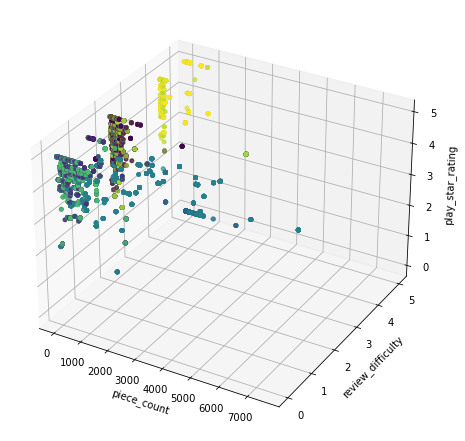

In [87]:

fig = plt.figure(figsize=(26, 26))
ax = fig.add_subplot(131, projection='3d')
                     #, projection='2d')
ax.scatter(lego['piece_count'], lego['review_difficulty'], lego['play_star_rating'], c=labels, s=15)
ax.set_xlabel('piece_count')
ax.set_ylabel('review_difficulty')
ax.set_zlabel('play_star_rating')
plt.show()

In [88]:
#Which age group submits the most reviews?

In [89]:
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [90]:
toprev = lego.groupby(['ages']).sum()
toprev.sort_values('num_reviews',ascending = False).head(5)

,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
ages,,,,,,
8,125239.7546,53379,1408407,1845.9,357,4200
7,60647.6869,19970,513056,829.3,234,2123
26,77695.6019,15355,567901,4774.9,1254,11878
5,28434.1997,11162,265585,1149.0,84,2986
19,65960.6293,10581,449443,6169.9,2391,14781


In [91]:
#Which are the most popular (i.e. with the most number of reviews) Lego sets purchased by customers 
#who are at the most 25 years old (<25 years)?

In [92]:
top25 = lego.loc[(lego['ages'] <25)]
top25.sort_values('num_reviews',ascending = False).head(10)

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
2240,7,158.5878,367,1969,4.6,1,2
11976,7,158.5878,367,1969,4.6,1,19
3629,7,141.7800,367,1969,4.6,1,4
6961,7,146.3878,367,1969,4.6,1,10
10330,7,158.5878,367,1969,4.6,1,15
4723,7,158.5878,367,1969,4.6,1,6
409,7,119.9900,367,1969,4.6,1,20
5295,7,131.8800,367,1969,4.6,1,7
8658,7,146.3878,367,1969,4.6,1,13
9757,7,181.8700,367,1969,4.6,1,16


In [93]:
#Based on the polarity of the sentiment, what are the top 20 positive and top 20 negative reviews?

In [94]:
import numpy as np  
# Import Pandas library.
import pandas as pd 
# Import for plot generation.
import matplotlib.pyplot as plt 
import vaderSentiment

In [95]:
# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
sia = SentimentIntensityAnalyzer()

In [96]:
grev = grev[grev['reviewText'].notna()] 
# This removes only the rows where the reviewText is missing, instead of dropna which removes all missing values

In [97]:
import numpy as np  
# Import Pandas library.
import pandas as pd 
# Import for plot generation.
import matplotlib.pyplot as plt 
import vaderSentiment

In [98]:
# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
sia = SentimentIntensityAnalyzer()

In [99]:
grev = pd.read_csv('game_reviews.csv')
grev = grev[grev['reviewText'].notna()] 
# This removes only the rows where the reviewText is missing, instead of dropna which removes all missing values

In [100]:
grev.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [101]:
scores=[]
for review in grev['reviewText']:
    score = sia.polarity_scores(review)["compound"]
    scores.append(score)
            
len(scores)

14990

In [102]:
grev['polarity_score'] = scores

In [103]:
grev.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image,polarity_score
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN,-0.6333
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN,0.9404
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN,-0.8334
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN,0.8997
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN,-0.6808


In [104]:
#top 20 

In [105]:
top20 = grev.sort_values('polarity_score',ascending = False).head(20)
top20

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image,polarity_score
12032,5,False,"03 18, 2015",A1J91RF51D4YTU,Rebekah Phillips Nelson,"Eminent Domain is a game by Seth Jaffee, publi...",Gaming Bits: Eminent Domain Review,1426636800,NaN,0.9999
3619,5,False,"04 12, 2005",A3QSXILNE7LMD6,Thomas J. Vasel,When I first heard about Days of Wonder's newe...,One of the best games - ever!,1113264000,NaN,0.9999
1121,5,False,"04 23, 2011",A3S9ZLLG1D86SO,Abchiptop,Disclaimer: Bought this from a local store. Pa...,Wrath of Ashardalon: great investment for an a...,1303516800,NaN,0.9996
7643,4,False,"08 12, 2010",A14TUWXDA5WQ7W,Baron Von Cool,The USA version of Ticket To Ride is fun but f...,"The Europe, Marklin, and Nordic Editions are s...",1281571200,NaN,0.9995
879,4,True,"09 10, 2012",A1UP19XQH91JT0,Dad&#039;s Gaming Addiction,"Whenever I see this game on my shelf, I get a ...",Acquire Review by Dad's Gaming Addiction,1347235200,NaN,0.9994
13994,2,False,"12 30, 2014",A1MUOOFQH6DZ07,LeeAnn F,Short impressions: Game is okay. It captures...,"The Robotech Game we Always Wanted, but: Okay ...",1419897600,NaN,0.9993
3571,5,True,"04 01, 2014",A2RM5ZSZJQL7WY,Susan Vdovichenko,"Newest update: My daughter is now 6.5, and I s...",Such a great idea for my 4-year-old,1396310400,NaN,0.9993
12040,4,True,"07 01, 2014",A3JSOG7YNNPORW,K. Garfield,So I went camping as kind of a chaperone with ...,A Vacation at the Boat Club,1404172800,NaN,0.9993
6425,5,True,"07 01, 2014",A3JSOG7YNNPORW,K. Garfield,"I needed that route! You just cut me off, now...",The Early Bird Catches the Worm,1404172800,NaN,0.9993
11188,5,False,"06 03, 2011",AN1OT3Q7I2ZBH,R. Newnham,The game is easy to learn and explain. One per...,Say Anything Family Edition is easy to learn a...,1307059200,NaN,0.9992


In [106]:
#bottom20
bottom20 = grev.sort_values('polarity_score',ascending = False).tail(20)
bottom20

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image,polarity_score
8689,2,False,"12 17, 2015",A3I18T8J8O4JWM,Brenda S.,"The doll is cute, but I hate the book. It sta...","Buy elf, not the book, unless you want you wan...",1450310400,NaN,-0.9293
14977,1,True,"04 28, 2018",A2OGEZ1SB4PPD7,Dr. Ashley,This bath toy needs to taken off the market! I...,Its a worthless piece of crap!!!,1524873600,NaN,-0.9311
12203,5,True,"05 17, 2011",A3N17A8DIP53FM,Richard Fortuna,For those who are fascinated by the Ray Kurzwe...,Ready for the Singularity?,1305590400,NaN,-0.9331
3628,3,True,"05 03, 2018",A22MSYJDB2UTDD,Markie Rodgers,Really excited to receive my game. But unfortu...,"Great game, unfortunate shipping mishap",1525305600,['https://images-na.ssl-images-amazon.com/imag...,-0.9337
10755,2,False,"11 25, 2010",A2M2KU5LVCAYU8,Kimberly,We heard about Elf on a Shelf from some friend...,The Elf Fell off the Shelf,1290643200,NaN,-0.9357
3964,1,True,"12 25, 2017",A1GKBGROLHU7X6,Amazon Customer,We opened this gift for Christmas today but ha...,Incomplete box; cards missing- cant play,1514160000,['https://images-na.ssl-images-amazon.com/imag...,-0.9366
12207,5,False,"03 04, 2011",A3P5DHXV4KUQS3,Matthew,ECLIPSE PHASE\n\nTranshumanism is the name of ...,TRANSHUMAN HORROR AT ITS BEST,1299196800,NaN,-0.9374
13490,4,True,"10 4, 2009",A1VTQ4A6EX520I,David V. Bennett,Takes a while to understand the complicated 16...,Illuminati card game,1254614400,NaN,-0.9380
11163,5,True,"09 09, 2015",A1WUEVN53ACMQV,Alann,"I have now use this deck a few times, and whil...",Five Stars,1441756800,NaN,-0.9441
12173,5,False,"12 8, 2014",A3CTP73U9VMVI8,M. Craft,This is the book that introduced me to several...,For those alone I can wholly recommend it. Pas...,1417996800,NaN,-0.9493
